In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# KERAS DOCUMENTATION TO ENSURE REPRODUCIBLE RESULTS
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

In [3]:
df = pd.read_csv("./data/fashion/fashion-mnist_train.zip")

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

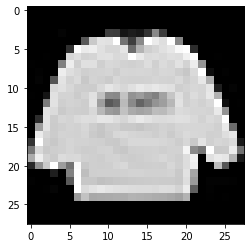

In [6]:
plt.imshow(df.iloc[0,1:].values.reshape(28, 28)/255, cmap='gray')

In [7]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1234)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1266/1266 [==============================] - 3s 2ms/step - loss: 2.2950 - accuracy: 0.1760 - val_loss: 2.0037 - val_accuracy: 0.2409
Epoch 2/20
1266/1266 [==============================] - 2s 1ms/step - loss: 1.9570 - accuracy: 0.2328 - val_loss: 1.8908 - val_accuracy: 0.2404
Epoch 3/20
1266/1266 [==============================] - 2s 1ms/step - loss: 1.9078 - accuracy: 0.2469 - val_loss: 1.9691 - val_accuracy: 0.2247
Epoch 4/20
1266/1266 [==============================] - 2s 1ms/step - loss: 1.8858 - accuracy: 0.2543 - val_loss: 1.9087 - val_accuracy: 0.2360
Epoch 5/20
1266/1266 [==============================] - 2s 2ms/step - loss: 1.8578 - accuracy: 0.2577 - val_loss: 1.8475 - val_accuracy: 0.2673
Epoch 6/20
1266/1266 [==============================] - 2s 2ms/step - loss: 1.8639 - accuracy: 0.2595 - val_loss: 1.8089 - val_accuracy: 0.2700
Epoch 7/20
1266/1266 [==============================] - 2s 2ms/step - loss: 1.8449 - accuracy: 0.2692 - val_loss: 1.7900 - val_accuracy:

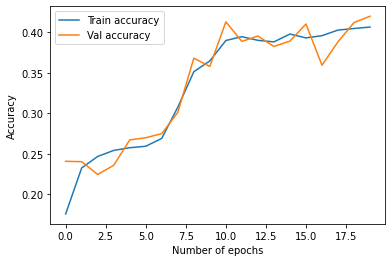

In [12]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(loc='best')